# GroupBy examples

Allen Downey

[MIT License](https://en.wikipedia.org/wiki/MIT_License)

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

from thinkstats2 import Pmf, Cdf

import thinkstats2
import thinkplot

decorate = thinkplot.config

Let's load the GSS dataset.

In [2]:
%time gss = pd.read_hdf('../homeworks/gss.hdf5', 'gss')
gss.head()

CPU times: user 164 ms, sys: 40.2 ms, total: 204 ms
Wall time: 203 ms


,year,id_,agewed,divorce,sibs,childs,age,educ,paeduc,maeduc,...,memchurh,realinc,cohort,marcohrt,ballot,wtssall,adults,compuse,databank,wtssnr
0,1972,167,0,0,2,0,26.0,18.0,12,12,...,0,13537.0,1946.0,0,0,0.8893,2.0,0,0,1.0
1,1972,1256,30,2,0,1,38.0,12.0,97,99,...,0,18951.0,1934.0,1964,0,0.4446,1.0,0,0,1.0
2,1972,415,0,0,7,0,57.0,12.0,7,7,...,0,30458.0,1915.0,0,0,1.3339,3.0,0,0,1.0
3,1972,234,18,1,6,3,61.0,14.0,8,5,...,0,37226.0,1911.0,1929,0,0.8893,2.0,0,0,1.0
4,1972,554,22,2,3,3,59.0,12.0,6,11,...,0,30458.0,1913.0,1935,0,0.8893,2.0,0,0,1.0


In [3]:
def counts(series):
    return series.value_counts(sort=False).sort_index()

The GSS interviews a few thousand respondents each year.

In [4]:
counts(gss['year'])

1972    1613
1973    1504
1974    1484
1975    1490
1976    1499
1977    1530
1978    1532
1980    1468
1982    1860
1983    1599
1984    1473
1985    1534
1986    1470
1987    1819
1988    1481
1989    1537
1990    1372
1991    1517
1993    1606
1994    2992
1996    2904
1998    2832
2000    2817
2002    2765
2004    2812
2006    4510
2008    2023
2010    2044
2012    1974
2014    2538
2016    2867
Name: year, dtype: int64

One of the [questions](https://gssdataexplorer.norc.org/projects/52787/variables/285/vshow) they ask is "Do you think the use of marijuana should be made legal or not?"

The answer codes are:

```
1	Legal
2	Not legal
8	Don't know
9	No answer
0	Not applicable
```

Here is the distribution of responses for all years.

In [5]:
counts(gss['grass'])

0    24398
1    11027
2    25195
8     1733
9      113
Name: grass, dtype: int64

I'll replace "Don't know", "No answer", and "Not applicable" with NaN.

In [6]:
gss['grass'].replace([0,8,9], np.nan, inplace=True)

And replace `2`, which represents "No", with `1`.  That way we can use `mean` to compute the fraction in favor.

In [7]:
gss['grass'].replace(2, 0, inplace=True)

Here are the value counts after replacement.

In [8]:
counts(gss['grass'])

0.0    25195
1.0    11027
Name: grass, dtype: int64

And here's the mean.

In [9]:
gss['grass'].mean()

0.3044282480260615

So 30% of respondents thought marijuana should be legal, at the time they were interviewed.

Now we can see how that fraction depends on age, cohort (year of birth), and period (year of interview).

### Group by year

First we'll group respondents by year.

In [10]:
grouped = gss.groupby('year')
grouped

The result in a `DataFrameGroupBy` object we can iterate through:

In [11]:
for name, group in grouped:
    print(name, len(group))

1972 1613
1973 1504
1974 1484
1975 1490
1976 1499
1977 1530
1978 1532
1980 1468
1982 1860
1983 1599
1984 1473
1985 1534
1986 1470
1987 1819
1988 1481
1989 1537
1990 1372
1991 1517
1993 1606
1994 2992
1996 2904
1998 2832
2000 2817
2002 2765
2004 2812
2006 4510
2008 2023
2010 2044
2012 1974
2014 2538
2016 2867


And we can compute summary statistics for each group.

In [12]:
for name, group in grouped:
    print(name, group['grass'].mean())

1972 nan
1973 0.20136518771331058
1974 nan
1975 0.22569198012775019
1976 0.29395604395604397
1977 nan
1978 0.3056501021102791
1980 0.2585844428871759
1982 nan
1983 0.23943661971830985
1984 0.2147887323943662
1985 nan
1986 0.17466945024356298
1987 0.15506508205998867
1988 0.1705170517051705
1989 0.17492416582406473
1990 0.15940366972477063
1991 0.17775467775467776
1993 0.24342745861733203
1994 0.24722075172048702
1996 0.28713910761154854
1998 0.2966589861751152
2000 0.3395810363836825
2002 0.3403755868544601
2004 0.35785536159601
2006 0.3435155412647374
2008 0.4001597444089457
2010 0.4773988897700238
2012 0.4835341365461847
2014 0.5790147152911068
2016 0.5911039657020365


Using a for loop can be useful for debugging, but it is more concise, more idiomatic, and faster to apply operations directly to the `DataFrameGroupBy` object.

For example, if you select a column from a `DataFrameGroupBy`, the result is a `SeriesGroupBy` that represents one `Series` for each group.

In [13]:
grouped['grass']

You can loop through the `SeriesGroupBy`, but you normally don't.

In [14]:
for name, series in grouped['grass']:
    print(name, series.mean())

1972 nan
1973 0.20136518771331058
1974 nan
1975 0.22569198012775019
1976 0.29395604395604397
1977 nan
1978 0.3056501021102791
1980 0.2585844428871759
1982 nan
1983 0.23943661971830985
1984 0.2147887323943662
1985 nan
1986 0.17466945024356298
1987 0.15506508205998867
1988 0.1705170517051705
1989 0.17492416582406473
1990 0.15940366972477063
1991 0.17775467775467776
1993 0.24342745861733203
1994 0.24722075172048702
1996 0.28713910761154854
1998 0.2966589861751152
2000 0.3395810363836825
2002 0.3403755868544601
2004 0.35785536159601
2006 0.3435155412647374
2008 0.4001597444089457
2010 0.4773988897700238
2012 0.4835341365461847
2014 0.5790147152911068
2016 0.5911039657020365


Instead, you can apply a function to the `SeriesGroupBy`; the result is a new `Series` that maps from group names to the results from the function; in this case, it's the fraction of support for each interview year.

In [15]:
series = grouped['grass'].mean()
series

year
1972         NaN
1973    0.201365
1974         NaN
1975    0.225692
1976    0.293956
1977         NaN
1978    0.305650
1980    0.258584
1982         NaN
1983    0.239437
1984    0.214789
1985         NaN
1986    0.174669
1987    0.155065
1988    0.170517
1989    0.174924
1990    0.159404
1991    0.177755
1993    0.243427
1994    0.247221
1996    0.287139
1998    0.296659
2000    0.339581
2002    0.340376
2004    0.357855
2006    0.343516
2008    0.400160
2010    0.477399
2012    0.483534
2014    0.579015
2016    0.591104
Name: grass, dtype: float64

Overall support for legalization has been increasing since 1990.

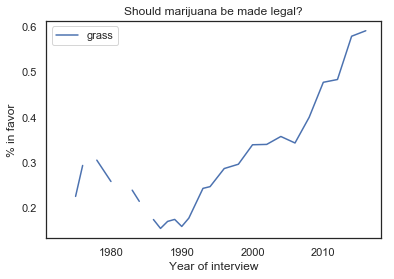

In [16]:
series.plot(color='C0')
decorate(xlabel='Year of interview', 
         ylabel='% in favor',
         title='Should marijuana be made legal?')

### Group by cohort

The variable `cohort` contains respondents' year of birth.

In [17]:
counts(gss['cohort'])

1883.0      2
1884.0      3
1885.0      2
1886.0      4
1887.0     10
1888.0      5
1889.0     14
1890.0     19
1891.0     25
1892.0     20
1893.0     29
1894.0     47
1895.0     43
1896.0     41
1897.0     52
1898.0     62
1899.0     93
1900.0    120
1901.0    104
1902.0    111
1903.0    128
1904.0    138
1905.0    169
1906.0    171
1907.0    236
1908.0    191
1909.0    257
1910.0    236
1911.0    255
1912.0    326
         ... 
1969.0    813
1970.0    809
1971.0    691
1972.0    649
1973.0    671
1974.0    641
1975.0    570
1976.0    542
1977.0    536
1978.0    483
1979.0    590
1980.0    476
1981.0    467
1982.0    413
1983.0    342
1984.0    335
1985.0    371
1986.0    278
1987.0    306
1988.0    205
1989.0    227
1990.0    185
1991.0    188
1992.0    107
1993.0    116
1994.0    116
1995.0     89
1996.0     50
1997.0     53
1998.0      6
Name: cohort, Length: 116, dtype: int64

Pulling together the code from the previous section, we can plot support for legalization by year of birth.

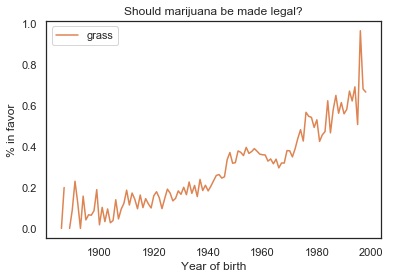

In [18]:
grouped = gss.groupby('cohort')
series = grouped['grass'].mean()
series.plot(color='C1')
decorate(xlabel='Year of birth', 
         ylabel='% in favor',
         title='Should marijuana be made legal?')

Later generations are more likely to support legalization than earlier generations.

### Group by age

Finally, let's see how support varies with age at time of interview.

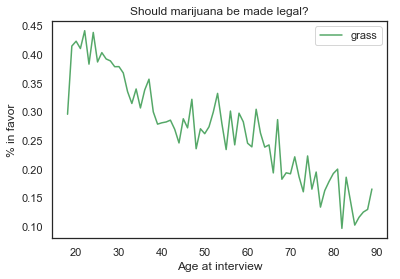

In [19]:
grouped = gss.groupby('age')
series = grouped['grass'].mean()
series.plot(color='C2')
decorate(xlabel='Age at interview', 
         ylabel='% in favor',
         title='Should marijuana be made legal?')

Younger people are more likely to support legalization than old people.

In general, it is not easy to separate period, cohort, and age effects, but there are ways.  We'll come back to this example to see how.